In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os

In [2]:
data = pd.read_csv(r"C:\Users\suraj\Downloads\Programs\ML\multiple_linear_regression_dataset.csv")




In [3]:
X = data[['age', 'experience']]
y = data['income']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [6]:
y_pred = model.predict(X_test)

In [7]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

MAE: 850.9347259704323
MSE: 1244356.6471791803
RMSE: 1115.5073496751065
R² Score: 0.9508709671946177


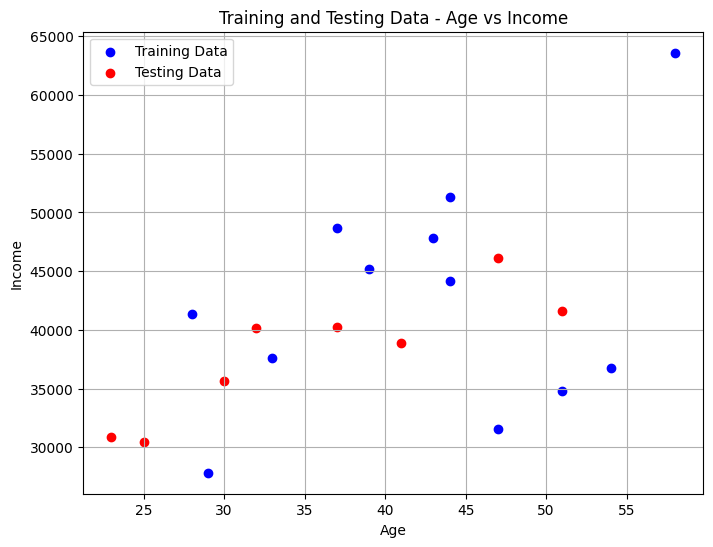

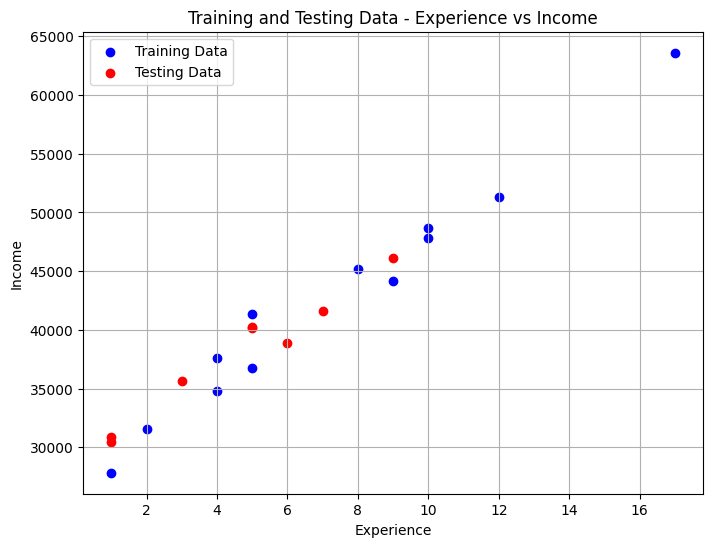

In [8]:
# Plot Age vs Income (Training Data)
plt.figure(figsize=(8, 6))
plt.scatter(X_train['age'], y_train, color='blue', label='Training Data')
plt.scatter(X_test['age'], y_test, color='red', label='Testing Data')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Training and Testing Data - Age vs Income')
plt.legend()
plt.grid(True)
plt.show()

# Plot Experience vs Income (Training Data)
plt.figure(figsize=(8, 6))
plt.scatter(X_train['experience'], y_train, color='blue', label='Training Data')
plt.scatter(X_test['experience'], y_test, color='red', label='Testing Data')
plt.xlabel('Experience')
plt.ylabel('Income')
plt.title('Training and Testing Data - Experience vs Income')
plt.legend()
plt.grid(True)
plt.show()

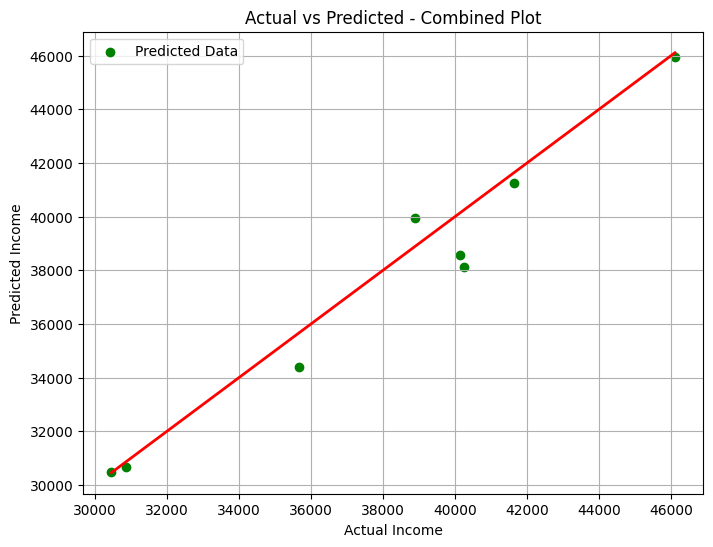

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', label='Predicted Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Perfect fit line
plt.xlabel('Actual Income')
plt.ylabel('Predicted Income')
plt.title('Actual vs Predicted - Combined Plot')
plt.legend()
plt.grid(True)
plt.show()

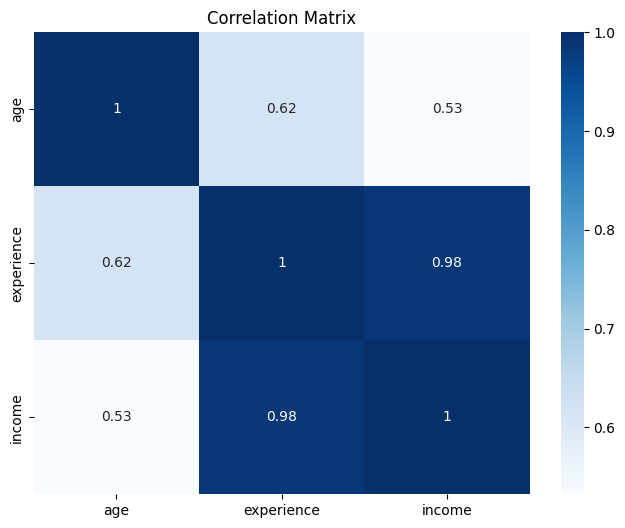

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
correlation_matrix = data.corr()  
sns.heatmap(correlation_matrix, annot=True, cmap="Blues")  
plt.title('Correlation Matrix')
plt.show()

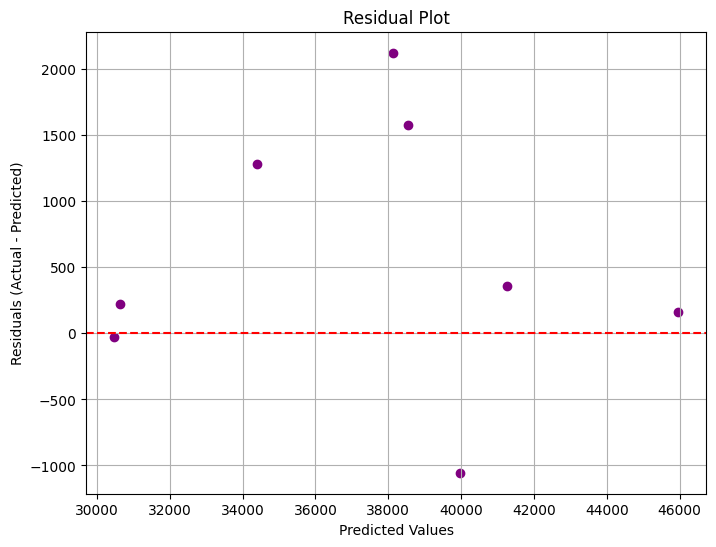

In [11]:
residuals = y_test - y_pred


plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')  
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

c:\Users\suraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


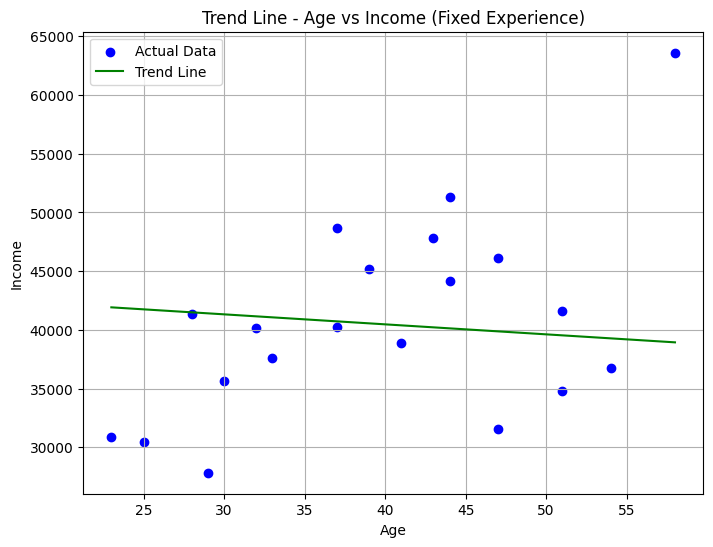

In [12]:
# Calculate mean value for 'experience'
mean_experience = X['experience'].mean()

# Create new X values with fixed experience
age_values = np.linspace(X['age'].min(), X['age'].max(), 100)  # Generate 100 points for smooth trend
fixed_experience = np.full((100, 1), mean_experience)  # Fixed value for experience

# Combine features
X_trend = np.column_stack((age_values, fixed_experience))

# Predictions
y_trend = model.predict(X_trend)

# Plot trend line
plt.figure(figsize=(8, 6))
plt.scatter(X['age'], y, color='blue', label='Actual Data')
plt.plot(age_values, y_trend, color='green', label='Trend Line')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Trend Line - Age vs Income (Fixed Experience)')
plt.legend()
plt.grid(True)
plt.show()

c:\Users\suraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


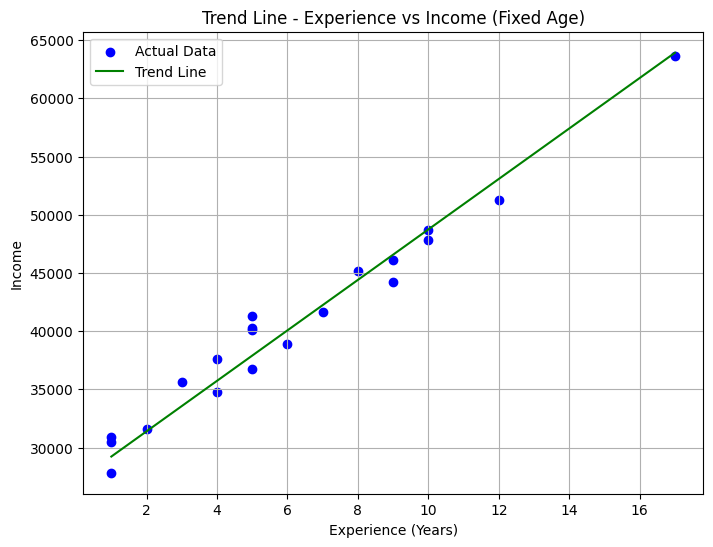

In [13]:
# Calculate mean value for 'age'
mean_age = X['age'].mean()

# Generate experience values and fix age
experience_values = np.linspace(X['experience'].min(), X['experience'].max(), 100)
fixed_age = np.full((100, 1), mean_age)

# Combine features
X_trend = np.column_stack((fixed_age, experience_values))

# Predict trend line
y_trend = model.predict(X_trend)

# Plot trend line
plt.figure(figsize=(8, 6))
plt.scatter(X['experience'], y, color='blue', label='Actual Data')  # Actual data points
plt.plot(experience_values, y_trend, color='green', label='Trend Line')  # Trend line
plt.xlabel('Experience (Years)')
plt.ylabel('Income')
plt.title('Trend Line - Experience vs Income (Fixed Age)')
plt.legend()
plt.grid(True)
plt.show()